Problem 2.5 - Generating Random Walks

In [ ]:
%pylab inline
from scipy import *
import numpy as np
import matplotlib.pyplot as plt

**p2.5 part (a)**

In [2]:
#1a.
#Returns an array/matrix of N rows and d columns with final destination at RandomWalk[N-1]
def RandomWalk(N, d):
    """
    Use random.uniform(min, max, shape) to generate an array of steps of shape (N,d), 
    and then use cumsum(..., axis=0) (which adds them up along the 'N' axis).
    """
    steps = random.uniform(-0.5,0.5,(N,d)) #Each step from -1/2 to 1/2
    origin = np.zeros((1,d))
    walk_start = np.concatenate((origin,steps),axis=0) #Include start at origin
    walks = np.cumsum(walk_start,axis=0) #axis=0 sums in x,y,z... separately.
    return walks

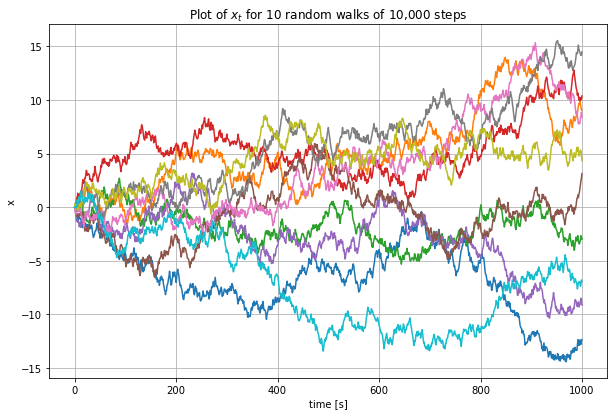

In [3]:
#2a. Plot x vs t for 10,000 step random walk of arbitrary time steps

m=10000 #number of steps in random walk
tau = 0.1 #time step in seconds
time = m*tau
d=1 #dimension

plt.figure(figsize=(10.0, 6.5))
plt.xlabel('time [s]')
plt.ylabel('x')
plt.grid(True)
plt.title(r'Plot of $x_t$ for 10 random walks of 10,000 steps')

for i in range (10):
    plt.plot(RandomWalk(int(time),d))


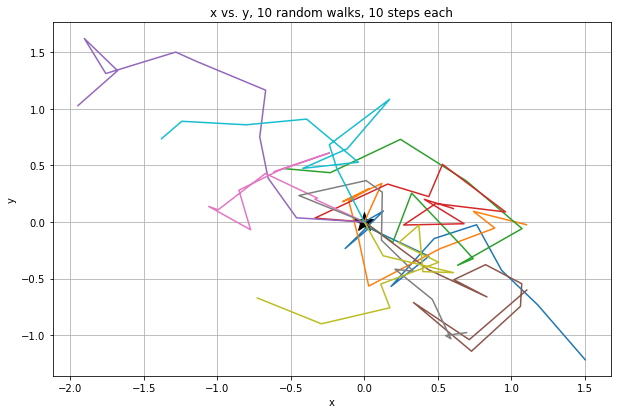

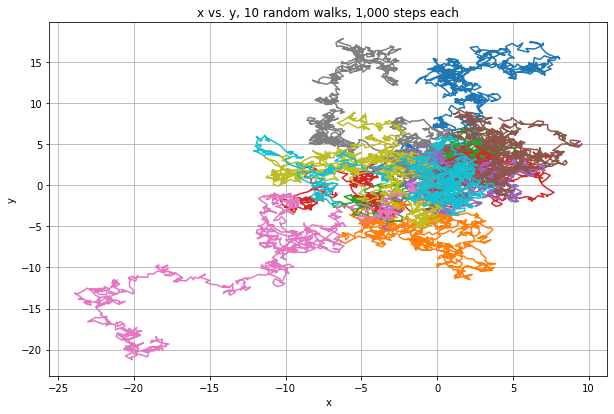

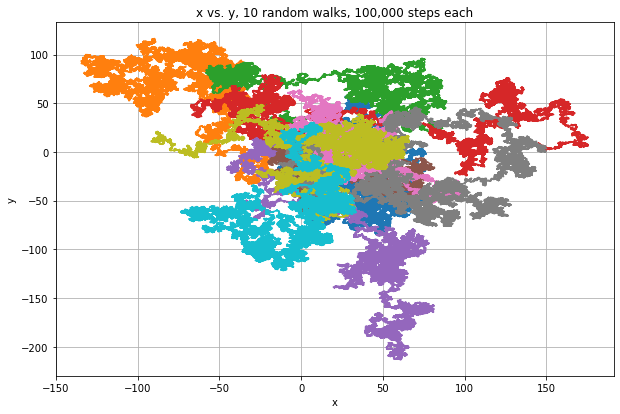

In [4]:
#3a.
#Create 3 random walk plots with a few random walks (we choose 10)
#Steps will be N = 10, 1000, 100,000

#Set plot parameters
plt.figure(figsize=(10.0, 6.5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(0,0,'*k',markersize=20) #plot marker (black star) at starting point
plt.title(r'x vs. y, 10 random walks, 10 steps each')
N=10
for i in range(10): 
    plot(RandomWalk(N,2)[:,0],RandomWalk(N,2)[:,1]) #[:,0] = x column [:,1] = y column

plt.figure(figsize=(10.0, 6.5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(0,0,'*k',markersize=20)
plt.title(r'x vs. y, 10 random walks, 1,000 steps each')
N=1000
for i in range(10):
    plot(RandomWalk(N,2)[:,0],RandomWalk(N,2)[:,1])




plt.figure(figsize=(10.0, 6.5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(0,0,'*k',markersize=20)
plt.title(r'x vs. y, 10 random walks, 100,000 steps each')
N=100000
for i in range(10):
    plot(RandomWalk(N,2)[:,0],RandomWalk(N,2)[:,1])



3a. Does multiplying the number of steps by 100 roughly increase the net distance by 10?

Ans: Yes, the average range of the random walks goes from $\pm$ 1, $\pm$ 10, to $\pm$ 100

p2.5 Part (b)

In [5]:
def Endpoints(W, N, d):
    endpoints = np.zeros((W,d))
    for i in range(W):
        steps = random.uniform(-0.5,0.5,(N,d)) #Each step from -1/2 to 1/2
        endpoints[i] = sum(steps, axis=0) #Endpoints for one random walk
    return endpoints

In [6]:
Endpoints(10000,10,3)

<ipython-input-5-aff35422ef0b>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  endpoints[i] = sum(steps, axis=0) #Endpoints for one random walk


array([[-0.67214522, -1.19916723,  2.75265886],
       [ 0.08250392,  0.8922061 , -0.5434521 ],
       [ 0.06187137, -1.34628963,  0.14139513],
       ...,
       [-0.358701  , -1.07108697,  1.52363987],
       [-0.15378754, -1.1726849 , -1.97713673],
       [-1.61030603, -0.71377198, -1.33784489]])

<ipython-input-5-aff35422ef0b>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  endpoints[i] = sum(steps, axis=0) #Endpoints for one random walk
<ipython-input-5-aff35422ef0b>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  endpoints[i] = sum(steps, axis=0) #Endpoints for one random walk
<ipython-input-5-aff35422ef0b>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  endpoints[i] = sum(steps, axis=0) #Endpoints for one random walk


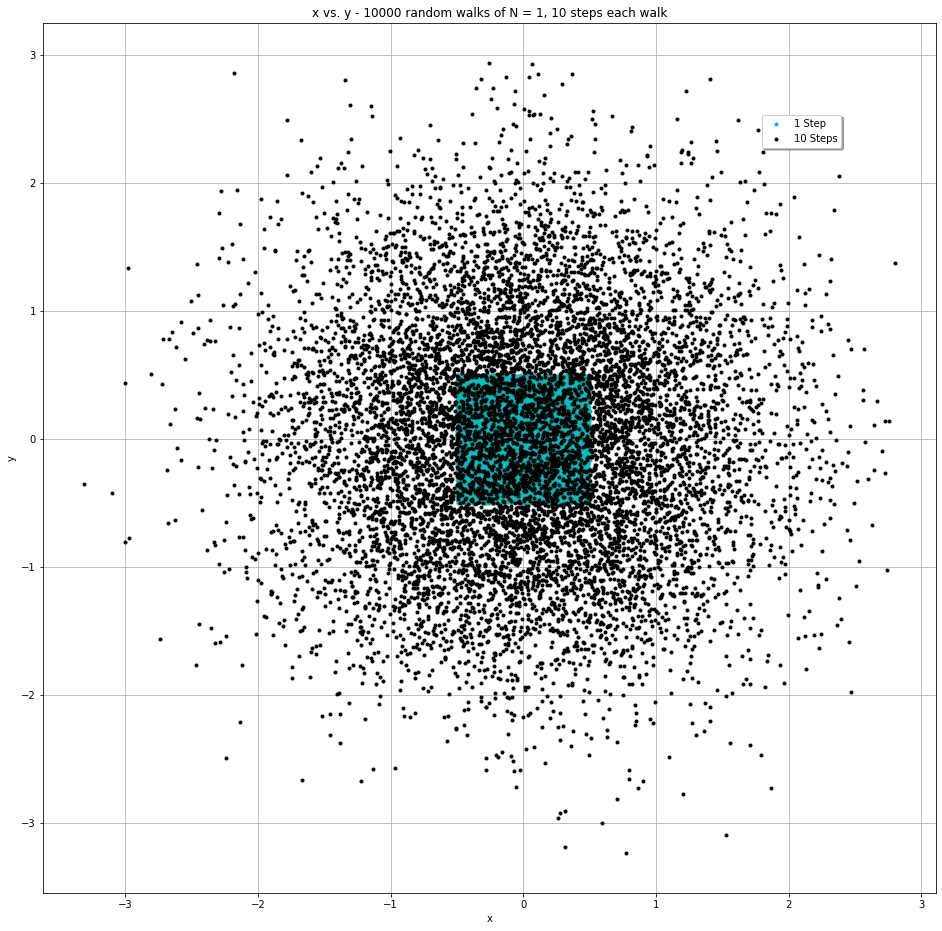

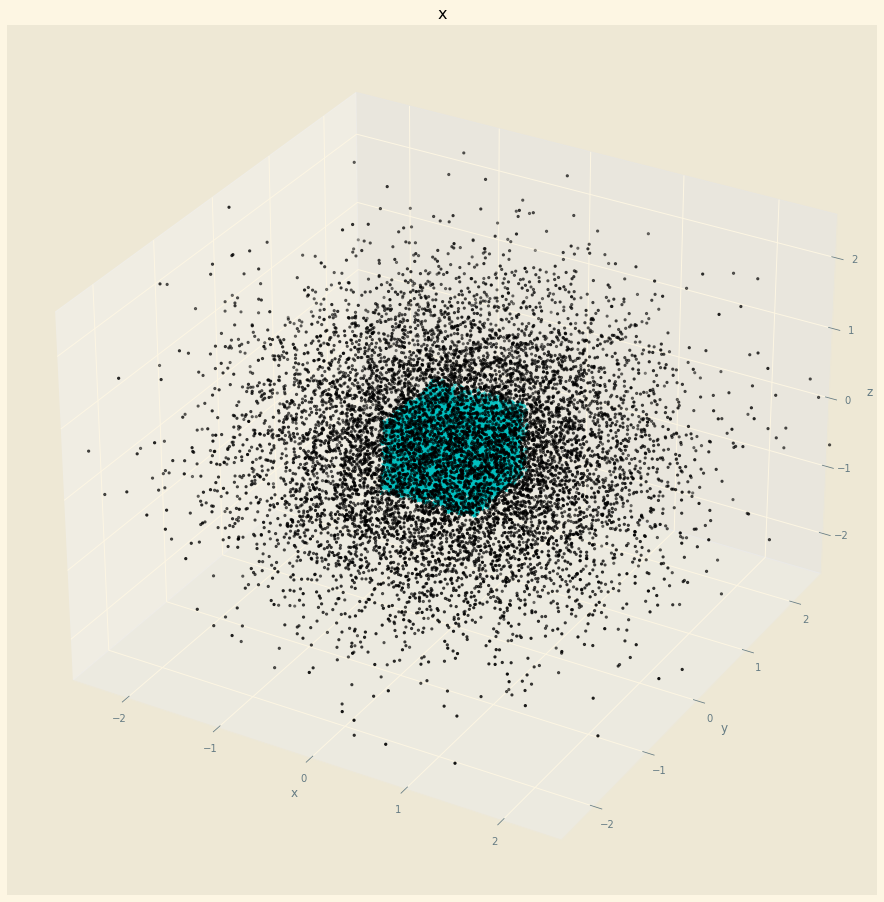

In [7]:
plt.figure(figsize=(16, 16))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title(r'x vs. y - 10000 random walks of N = 1, 10 steps each walk')
x, y = Endpoints(10000,1,2).transpose()
plt.plot(x,y,'.c')

""""""""""
plt.figure(figsize=(10, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title(r'x vs. y, W = 10000 random walks, N = 1 and 10')
"""""""""""
x, y = Endpoints(10000,10,2).transpose()
plt.plot(x,y,'.k')
plt.legend(['1 Step','10 Steps'], bbox_to_anchor=(.4,.4,.5,.5),shadow=True)

plt.style.use('Solarize_Light2')

# Make 3D Scatter

x,y,z = Endpoints(10000,1,3).transpose()
# Plot

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,16))
#plt.subplots_adjust(top=1, bottom=-1)

ax.scatter(x,y,z,color='c',marker='*',depthshade=True)
x,y,z = Endpoints(10000,10,3).transpose()
ax.scatter(x,y,z,color='k',marker='.',depthshade=True)
ax.set(xlim=(-2.5,2.5),ylim=(-2.5,2.5),zlim=(-2.5,2.5))
ax.set(xlabel=('x'),ylabel=('y'),zlabel=('z'))
ax.set(title=('x'))
plt.show()

Part (c) Calculate RMS step-size for 1D Random Walk of N steps. Write a routine for histogram of W random walks and fit a Gaussian. How quickly does the distribution become a good approximation of a random walk?

<ipython-input-5-aff35422ef0b>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  endpoints[i] = sum(steps, axis=0) #Endpoints for one random walk
<ipython-input-8-80de4d972185>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigma = a*sqrt(N)
<ipython-input-8-80de4d972185>:5: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x = arange(-3.*sigma, 3.*sigma, 0.1*sigma)
<ipython-input-8-80de4d972185>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  gauss = (1./(sqrt(2*np.pi)*sigma))*exp(-x**2./(2*sigma**2))
<ipython-input-8-80de4d972185>:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  gauss = (1./(sqrt(2*np.pi)*sigma))*exp(-x**2./(2*sigma**2))


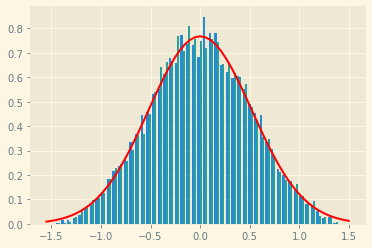

In [8]:
N = 3
a = .3
hist(Endpoints(10000,N,2), bins = 50,density=True) #Density normalizes to probability distribution
sigma = a*sqrt(N)
x = arange(-3.*sigma, 3.*sigma, 0.1*sigma)
gauss = (1./(sqrt(2*np.pi)*sigma))*exp(-x**2./(2*sigma**2))
plt.plot(x,gauss,'r')
plt.show()

The RMS step size for Gaussian is a=0.3 for an N=3 Random Walk.

The histogram becomes a Gaussian at N=3, such that the random walk of N steps approaches a Gaussian. At N=1, it is a square distribution. At N=2, it is a triangle.